In [26]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [2]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
PLAID_CLIENT_ID = os.getenv('PLAID_API_KEY')
PLAID_SECRET = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_API_PUBLIC')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [4]:
INSTITUTION_ID = "ins_109508"

In [5]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

### 2. Generate a public token

In [6]:
# Create public token to be exchanged for institution access token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])


### 3. Exchange the public token for an access token

In [14]:
# Exchange public token for access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Store access token as variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [15]:
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'QED4R7jvwDCGnXQXgpmmt1QlmKJRpxHp7llje',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'ZvW1kporXWCJnVyVEqGGI3y5GNWqezTgX11xG',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'MpD3nRabvDfjpwJwkRGGCLeAG6mnXpt9PRRmR',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [16]:
# Extract Transactions with date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now()) 
transactions_response = client.Transactions.get(access_token, start_date, end_date)
print(json.dumps(transactions_response['transactions'][:2],indent=2, sort_keys=True))

[
  {
    "account_id": "1bEkALoKdEfPQzgzlAWWU893ZDaKVWc5ePPD9",
    "account_owner": null,
    "amount": 500,
    "authorized_date": null,
    "category": [
      "Food and Drink",
      "Restaurants"
    ],
    "category_id": "13005000",
    "date": "2020-04-25",
    "iso_currency_code": "USD",
    "location": {
      "address": null,
      "city": null,
      "country": null,
      "lat": null,
      "lon": null,
      "postal_code": null,
      "region": null,
      "store_number": null
    },
    "name": "Tectra Inc",
    "payment_channel": "in store",
    "payment_meta": {
      "by_order_of": null,
      "payee": null,
      "payer": null,
      "payment_method": null,
      "payment_processor": null,
      "ppd_id": null,
      "reason": null,
      "reference_number": null
    },
    "pending": false,
    "pending_transaction_id": null,
    "transaction_code": null,
    "transaction_id": "3yA7ZL8z4ASZ83E3GQbbhrL7NMoWjViqnVVWd",
    "transaction_type": "place",
    "unofficial_

### 2. Print the categories for each transaction

In [17]:
# Iterate and parse JSON response
for transactions in transactions_response['transactions']:
        print(json.dumps(transactions['category']))

["Food and Drink", "Restaurants"]
["Payment"]
["Food and Drink", "Restaurants", "Fast Food"]
["Shops", "Sporting Goods"]
["Payment", "Credit Card"]
["Travel", "Taxi"]
["Transfer", "Debit"]
["Transfer", "Deposit"]
["Recreation", "Gyms and Fitness Centers"]
["Travel", "Airlines and Aviation Services"]
["Food and Drink", "Restaurants", "Fast Food"]
["Food and Drink", "Restaurants", "Coffee Shop"]
["Food and Drink", "Restaurants"]
["Transfer", "Credit"]
["Travel", "Airlines and Aviation Services"]
["Travel", "Taxi"]
["Food and Drink", "Restaurants"]
["Payment"]
["Food and Drink", "Restaurants", "Fast Food"]
["Shops", "Sporting Goods"]
["Payment", "Credit Card"]
["Travel", "Taxi"]
["Transfer", "Debit"]
["Transfer", "Deposit"]
["Recreation", "Gyms and Fitness Centers"]
["Travel", "Airlines and Aviation Services"]
["Food and Drink", "Restaurants", "Fast Food"]
["Food and Drink", "Restaurants", "Coffee Shop"]
["Food and Drink", "Restaurants"]
["Transfer", "Credit"]
["Travel", "Airlines and Avi

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [18]:
df = pd.DataFrame.from_dict(transactions_response['transactions'])
df[['category1','c2', 'c3']] = pd.DataFrame(df.category.values.tolist(), index= df.index)
df.drop(df.columns.difference(['amount','category1', 'date', 'name']), 1, inplace=True)
df = df[['date', 'amount', 'name', 'category1']].rename(columns={"category1": "category"})
df.head()

,date,amount,name,category
0,2020-04-25,500.0,Tectra Inc,Food and Drink
1,2020-04-24,2078.5,AUTOMATIC PAYMENT - THANK,Payment
2,2020-04-24,500.0,KFC,Food and Drink
3,2020-04-24,500.0,Madison Bicycle Shop,Shops
4,2020-04-15,25.0,CREDIT CARD 3333 PAYMENT *//,Payment


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [19]:
df['amount'] = df['amount'].astype(float)
df.set_index(pd.to_datetime(df['date'], infer_datetime_format=True), inplace=True)
df.drop(columns=['date'])
df.count()

date        49
amount      49
name        49
category    49
dtype: int64

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [20]:
# YOUR CODE HERE
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-365))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now()) 
income_response = client.Income.get(access_token)
print(json.dumps(income_response['income'],indent=2, sort_keys=True))

{
  "income_streams": [
    {
      "confidence": 0.99,
      "days": 690,
      "monthly_income": 500,
      "name": "UNITED AIRLINES"
    }
  ],
  "last_year_income": 6000,
  "last_year_income_before_tax": 7285,
  "max_number_of_overlapping_income_streams": 1,
  "number_of_income_streams": 1,
  "projected_yearly_income": 6085,
  "projected_yearly_income_before_tax": 7389
}


In [21]:
print('Previous year gross income was:')
print (income_response['income']['last_year_income_before_tax'])
print('The current monthly income is:')
monthly_income = income_response['income']['income_streams'][0]['monthly_income']
print(monthly_income)
print('The projected yearly net income is:')
print (income_response['income']['projected_yearly_income'])
print('The projected yearly gross income is:')
print (income_response['income']['projected_yearly_income_before_tax'])

Previous year gross income was:
7285
The current monthly income is:
500
The projected yearly net income is:
6085
The projected yearly gross income is:
7389


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [22]:
print(df.groupby('category').sum())

                  amount
category                
Food and Drink   3817.19
Payment          6310.50
Recreation        235.50
Shops            1500.00
Transfer        20537.34
Travel             35.19


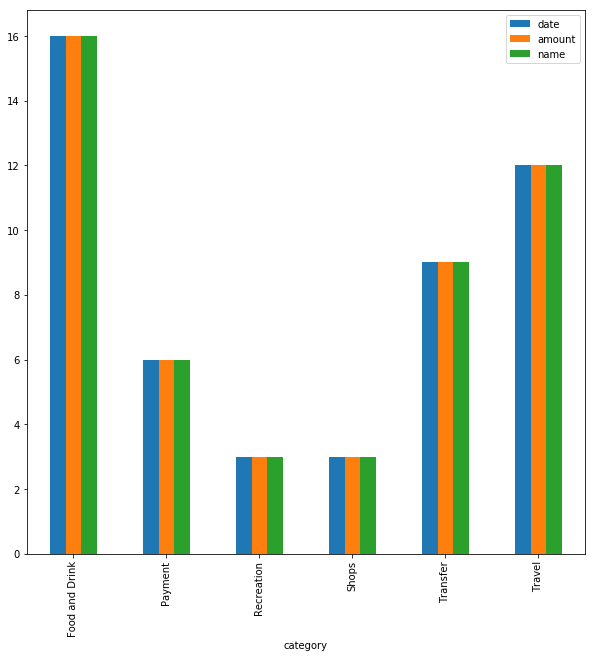

In [23]:
df.groupby('category').count().plot.bar(figsize=(10,10))

### Calculate the expenses per month

In [24]:
df_month = df.groupby(pd.Grouper(freq='M'))
df_month_expenses = df_month.sum()
print(df_month_expenses)

              amount
date                
2020-01-31   1006.33
2020-02-29  10145.24
2020-03-31  11145.24
2020-04-30  10138.91


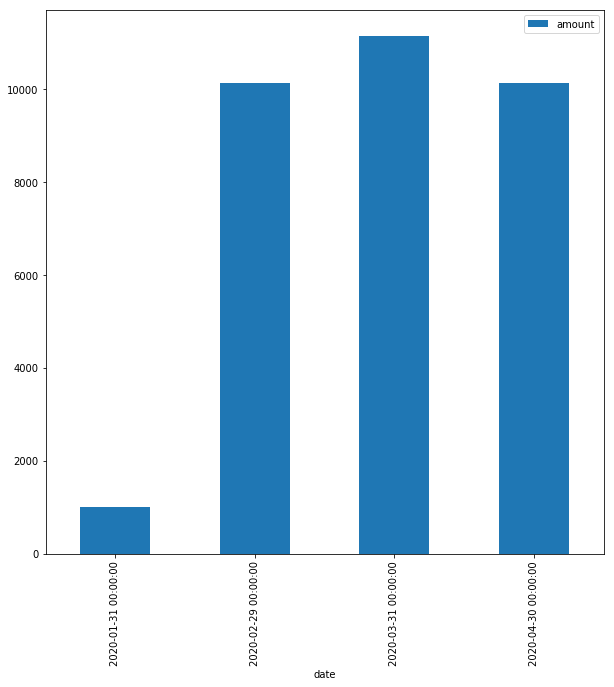

In [25]:
# YOUR CODE HERE
df_month = df.groupby(pd.Grouper(freq='M'))
df_month.sum().plot.bar(figsize=(10,10))